# PART3 特徴量を作ってみよう

## おまじない

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

## データの読み込み
- train.csvとtest.csvとsample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう
- sampleを読み込む時は、header=Noneというオプションを忘れないようにしましょう

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv",header=None)

## yの折れ線グラフを描いてみましょう

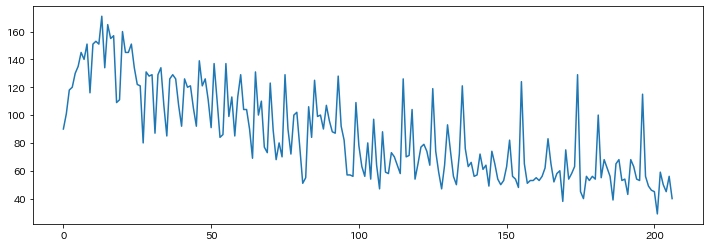

In [4]:
train["y"].plot(figsize=(12,4))

## trainの先頭行を表示してみよう

In [5]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


## trainのdatetimeから年と月のデータを取り出し、trainの新たなカラムとして追加しましょう
- apply関数とsplit関数を使います
- 年の新しいカラム名はyearとし、月の新しいカラム名はmonthとしましょう

In [6]:
train["year"] = train["datetime"].apply(lambda x: x.split("-")[0])
train["month"] = train["datetime"].apply(lambda x: x.split("-")[1])

## trainの中身を確認してみましょう

In [7]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11


## 同様にtestもdatetimeから年と月のデータを取り出し、testの新たなカラムとして追加しましょう

In [8]:
test["year"] = test["datetime"].apply(lambda x: x.split("-")[0])
test["month"] = test["datetime"].apply(lambda x: x.split("-")[1])

## trainのデータの型を確認してみましょう

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
 12  year           207 non-null    object 
 13  month          207 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.8+ KB


## train,testのデータの型を整数（int）に変換しましょう
- データの型を変換したい場合は、astype関数を使います
- オプションにはデータの型を入れます。今回は整数に変換したい為、np.intと書きます
- 変換したものは、もとのカラムに代入しなおしましょう

In [10]:
train["year"] = train["year"].astype(np.int)
train["month"] = train["month"].astype(np.int)

In [11]:
test["year"] = test["year"].astype(np.int)
test["month"] = test["month"].astype(np.int)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
 12  year           207 non-null    int32  
 13  month          207 non-null    int32  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 21.1+ KB


## train,testからyearとmonthを取り出し、変数trainX,testXに代入しましょう

In [13]:
trainX = train[["year","month"]]
testX = test[["year","month"]]

## trainXの中身を確認してみましょう

In [14]:
trainX.head()

,year,month
0,2013,11
1,2013,11
2,2013,11
3,2013,11
4,2013,11


## trainからyを取り出し、変数yに代入しましょう

In [15]:
y = train["y"]

## 回帰モデルの箱を用意しましょう
- 変数名はmodel1としましょう

In [16]:
model1 = LR()

## 重回帰モデルを作りましょう

In [18]:
model1.fit(trainX,y)

LinearRegression()

## 作ったモデルの傾きや切片を確かめてみましょう

In [19]:
model1.coef_

array([-104.0107109 ,   -7.41004428])

In [20]:
model1.intercept_

209594.15656370853

## testXを使って予測をし、予測結果を変数predに代入しましょう

In [21]:
pred = model1.predict(testX)

## sample[1]に予測結果を代入しましょう

In [22]:
sample[1] = pred

## sampleを"submit4.csv"というファイルで出力して、DeepAnalyticsに投稿しましょう

In [23]:
sample.to_csv("submit4.csv",index=None,header=None)

## 追加する特徴量検討の為に、trainXに対する予測値を変数predに代入しましょう
- trainXに対して予測を行えば、実際の売り上げyがわかっているので、その差を比較することができます
- そこでtrainXに対する予測値と、実際の売り上げyとを引き算することで、どの日が大きく予測を外していたかを確認します
- 大きく外れていたものから共通する要素が見つけられれば、その要素を加えることで更に精度が良いモデルを作れる可能性があります
- その準備として、まずmodel1とtrainXを使って、trainXに対する予測値を求めましょう

In [24]:
pred = model1.predict(trainX)

## predをtrainの新たなカラムpredとして代入しましょう

In [25]:
train["pred"] = pred

In [26]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,pred
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,139.085028
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,139.085028
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,139.085028
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,139.085028
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,139.085028


## trainのyとpredを引き算した結果をtrainの新たなカラムresとして代入しましょう
- yとpredを引き算する為には、単純にtrain["y"] - train["pred"]と書きます

In [27]:
train["res"] = train["y"] - train["pred"]

## trainのresでソートして中身を確認しましょう
- 今回はhead関数を使わず、表示しましょう

In [28]:
train.sort_values(by="res")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,pred,res
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,131.674984,-51.674984
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,139.085028,-49.085028
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,2014,3,94.354672,-43.354672
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,94.354672,-39.354672
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,139.085028,-38.085028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,2014,5,79.534583,46.465417
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,72.124539,48.875461
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,64.714495,59.285505
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,49.894406,65.105594


## 値が「お楽しみメニュー」であれば１、そうでなければ0とする自作関数を作りましょう
- 自作の関数を作る為には、defを使います

In [29]:
def jisaku1(x):
    if x == "お楽しみメニュー":
        return 1
    else:
        return 0

## jisaku1関数とapply関数を使って、trainとtestの新たなカラムfunを作りましょう

In [32]:
train["fun"] = train["remarks"].apply(lambda x :jisaku1(x))
test["fun"] = train["remarks"].apply(lambda x :jisaku1(x))

## trainの中身を確認してみましょう

In [34]:
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,pred,res,fun
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,139.085028,-49.085028,0
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,139.085028,-38.085028,0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,139.085028,-21.085028,0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,139.085028,-19.085028,0
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,139.085028,-9.085028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8,2014,9,49.894406,9.105594,0
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4,2014,9,49.894406,0.105594,0
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1,2014,9,49.894406,-4.894406,0
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6,2014,9,49.894406,6.105594,0


## train,testからyearとmonth、funとtemperatureの4カラムを取り出し、変数trainX,testXに代入しましょう

In [35]:
trainX = train[["year","month","fun","temperature"]]
testX = test[["year","month","fun","temperature"]]

## 回帰モデルの箱を用意しましょう
- 変数名はmodel2としましょう

In [36]:
model2 = LR()

## 重回帰モデルを作りましょう

In [37]:
model2.fit(trainX,y)

LinearRegression()

## 作ったモデルの傾きや切片を確かめてみましょう

In [38]:
model2.coef_

array([-76.3765687 ,  -4.20489757,  44.63348171,  -1.25463854])

In [39]:
model2.intercept_

153945.25411758252

## testXを使って予測をし、予測結果を変数pred2に代入しましょう

In [40]:
pred2 = model2.predict(testX)

## sample[1]に予測結果を代入しましょう

In [41]:
sample[1] = pred2

## sampleを"submit5.csv"というファイルで出力して、DeepAnalyticsに投稿しましょう

In [42]:
sample.to_csv("submit5.csv",index=None,header=None)